In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('/content/fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')

# Clean the data by filtering out the top and bottom 2.5% of page views
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

# Display the first few rows of the cleaned data
df.head()


,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


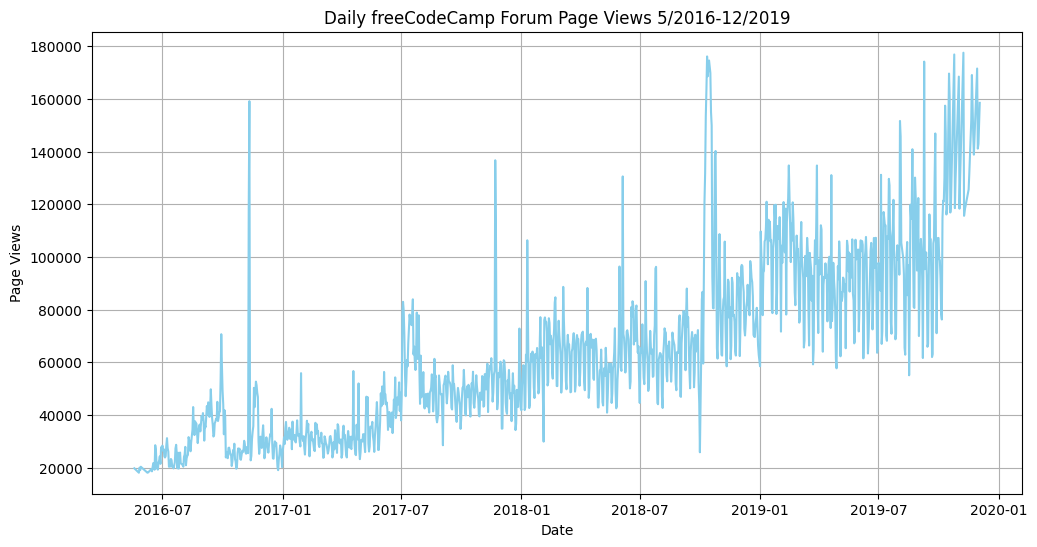

In [2]:
def draw_line_plot():
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['value'], color='skyblue')
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.ylabel('Page Views')
    plt.grid(True)
    plt.show()

draw_line_plot()


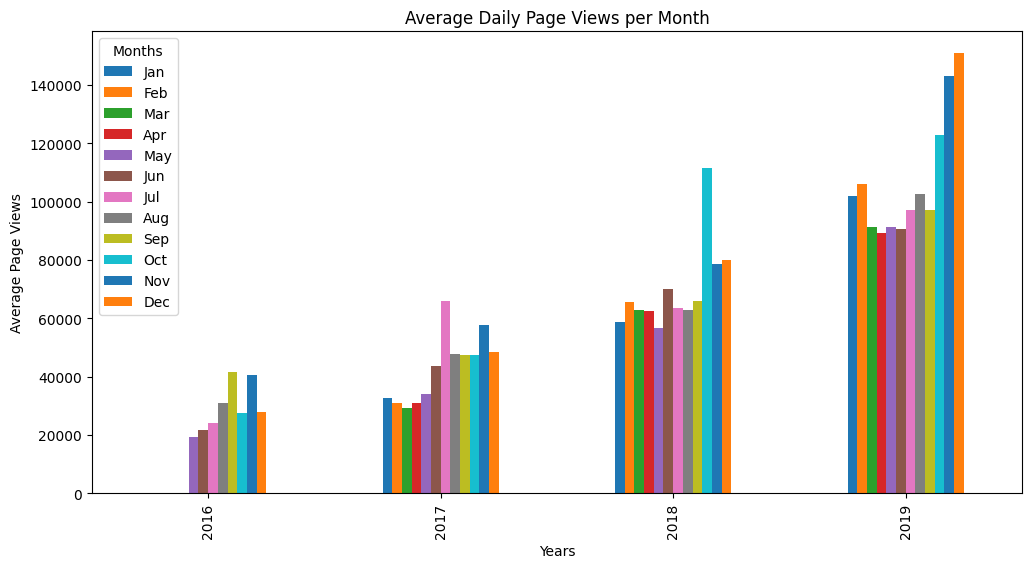

In [3]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month
    df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack()

    # Plot
    df_bar.plot(kind='bar', figsize=(12, 6), legend=True)
    plt.title('Average Daily Page Views per Month')
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.legend(title='Months', labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.show()

draw_bar_plot()


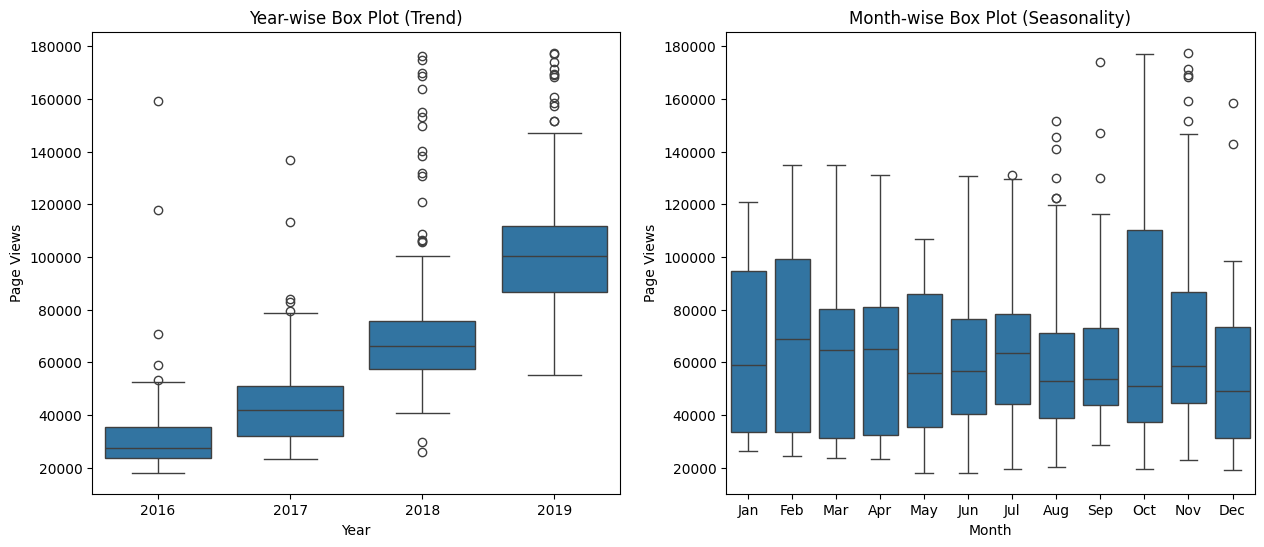

In [4]:
def draw_box_plot():
    # Prepare data for box plots
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box['date']]
    df_box['month'] = [d.strftime('%b') for d in df_box['date']]
    df_box['month_num'] = df_box['date'].dt.month
    df_box = df_box.sort_values('month_num')

    # Draw the box plots (using Seaborn)
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
    sns.boxplot(x='month', y='value', data=df_box, ax=axes[1])

    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    plt.show()

draw_box_plot()
